Imports:

In [1]:
import os
import numpy as np
import glob2
import matplotlib.pyplot as plt

Read all the avaiable data and put them into fitting datastructures.

classnames => list of the 6 classes from .txt

featurenames => list of 548 feature names from .txt

labels_data => list of 6 classes and within list of the individual sample labels

features_data => list of 6 classes and within list of the indiviual sample features


In [18]:
base_folder = 'trainset_python/python'
base_folder_items = os.listdir('trainset_python/python')
classnames_txt = 'class_names.txt'
featurenames_txt = 'feature_names.txt'
labels_hist = ['comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']
files_in_folders = []

with open(os.path.join(base_folder, classnames_txt), 'r') as file:
    classnames = file.read()
with open(os.path.join(base_folder, featurenames_txt), 'r') as file:
    featurenames = file.read()
    featurenames = featurenames.split('\n')
        
for item in base_folder_items:
    if not item.endswith('.txt'):
        files_in_folders.append(glob2.glob(os.path.join(os.path.join(base_folder, item), '**/*')))

labels_files = []
features_files = []

for folder in files_in_folders:
    labels_files.append([label for label in folder if 'labels' in label])
    features_files.append([feature for feature in folder if not 'labels' in feature])

labels_data = []
features_data = []

for labels in labels_files:
    labels_class = []
    for label in labels:
        labels_class.append(np.load(label))
    labels_data.append(labels_class)
    
for features in features_files:
    features_class = []
    for feature in features:
        features_class.append(np.load(feature))
    features_data.append(features_class)

1. Annotator agreement

How consistent are the annotations? Do different annotators agree in their labels for the same fragment?

In [3]:
agreements = []
for i in range(len(labels_data)):
    agreements_class = []
    for j in range(len(labels_data[i])):
        for y in range(len(labels_data[i][j])):
            annotators_labels = np.delete(labels_data[i][j], 0, 1)
            for z in range(len(annotators_labels)):
                if any(num != 0 for num in annotators_labels[z]):
                    nonzero = np.count_nonzero(annotators_labels[z])/len(annotators_labels[z])
                    agreements_class.append(nonzero)
    agreements.append(sum(agreements_class)/len(agreements_class))
    
print(agreements)

[0.6382588461071845, 0.7618565737394997, 0.7413653998014866, 0.614293958988355, 0.5726236041124221, 0.6238130252093582]


In [4]:
print('Agreement of the annotators when at least one annotation indicated that a target bird-call was audible')

for i in range(len(agreements)):
    print(f'{labels_hist[i]}: {agreements[i]}')

Agreement of the annotators when at least one annotation indicated that a target bird-call was audible
comcuc: 0.6382588461071845
cowpig1: 0.7618565737394997
eucdov: 0.7413653998014866
eueowl1: 0.614293958988355
grswoo: 0.5726236041124221
tawowl1: 0.6238130252093582


2. Label characteristics

How are the class labels distributed? Are the classes un-
balanced, and how much? What is the average duration of a species’ calls (or
drumming)? Are there large inter-/intra-class variations?

In [5]:
#print(labels_data[0][0][:])

def getSequenceLengthForClass(class_nr, column = 0):
    sequences = []
    for j in range(len(labels_data[class_nr])):
        sequence = []
        call = 0
        for label in labels_data[class_nr][j][:, column]:
            if label:
                call += 1
            elif call == 0:
                pass
            else:
                sequence.append(call)
                call = 0
        if call != 0:
            sequence.append(call)
        sequences.append(sequence)
    return sequences

call_sequences = []
call_sequences_hist = [] 
for i in range(len(labels_data)):
    call_sequence = getSequenceLengthForClass(i)
    call_sequences.append(call_sequence)
    call_sequences_hist.append([element for elements in call_sequence for element in elements])


In [6]:
print('Calls annotated per bird in total: \n')
for i in range(len(call_sequences_hist)):
    print(f'''{labels_hist[i]}:
        Number of calls: {len(call_sequences_hist[i])}
        Mean: {np.mean(np.array(call_sequences_hist[i]))}
        Variance: {np.var(np.array(call_sequences_hist[i]))}'''
         )

Calls annotated per bird in total: 

comcuc:
        Number of calls: 1686
        Mean: 3.459667852906287
        Variance: 1.0550162597850696
cowpig1:
        Number of calls: 1120
        Mean: 7.994642857142857
        Variance: 118.36068558673469
eucdov:
        Number of calls: 1513
        Mean: 5.418374091209517
        Variance: 13.725161401364426
eueowl1:
        Number of calls: 678
        Mean: 3.4277286135693217
        Variance: 7.185779796555893
grswoo:
        Number of calls: 1863
        Mean: 2.7434245840042943
        Variance: 49.38344441822548
tawowl1:
        Number of calls: 1050
        Mean: 4.020952380952381
        Variance: 8.658608616780045


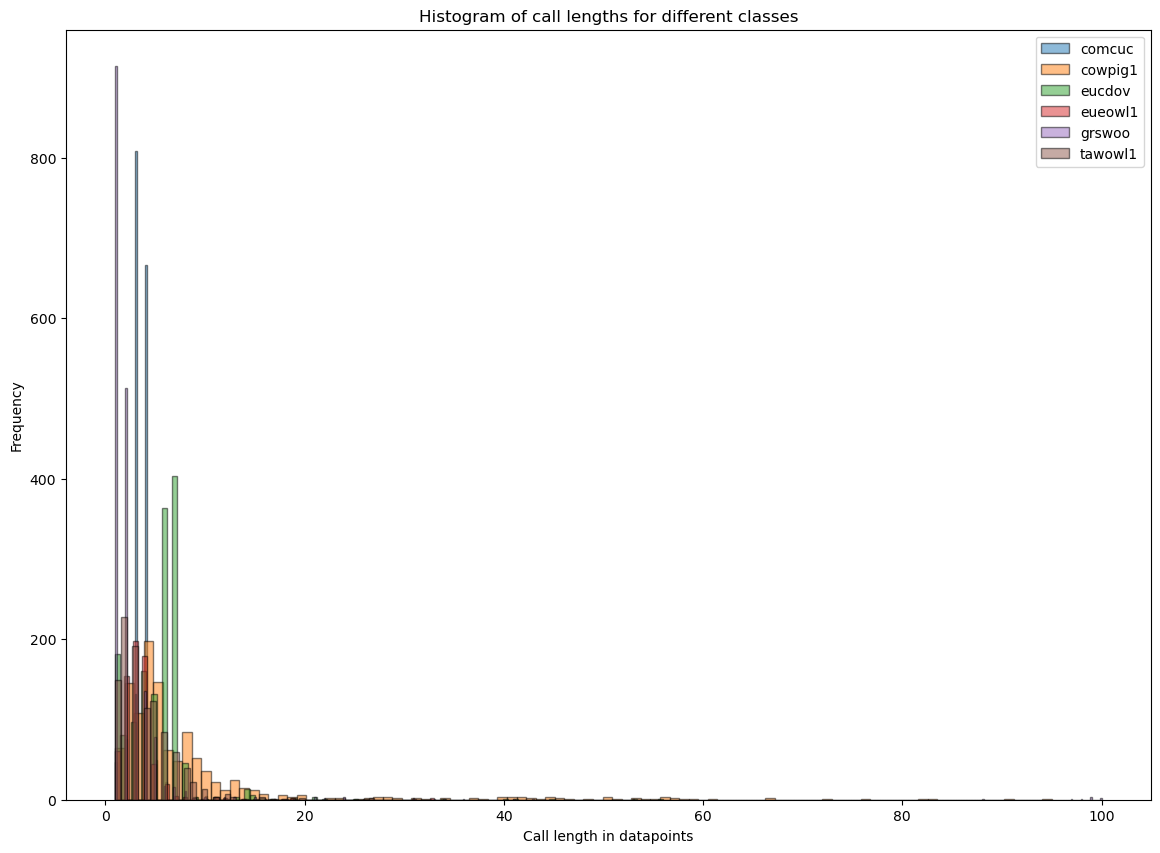

In [7]:
plt.figure(figsize=(14,10))

for class_data, label in zip(call_sequences_hist, labels_hist):
    plt.hist(class_data, bins='auto', alpha=0.5, edgecolor='black', label=label)
plt.title('Histogram of call lengths for different classes')
plt.xlabel('Call length in datapoints')
plt.ylabel('Frequency')
plt.legend()
plt.show()

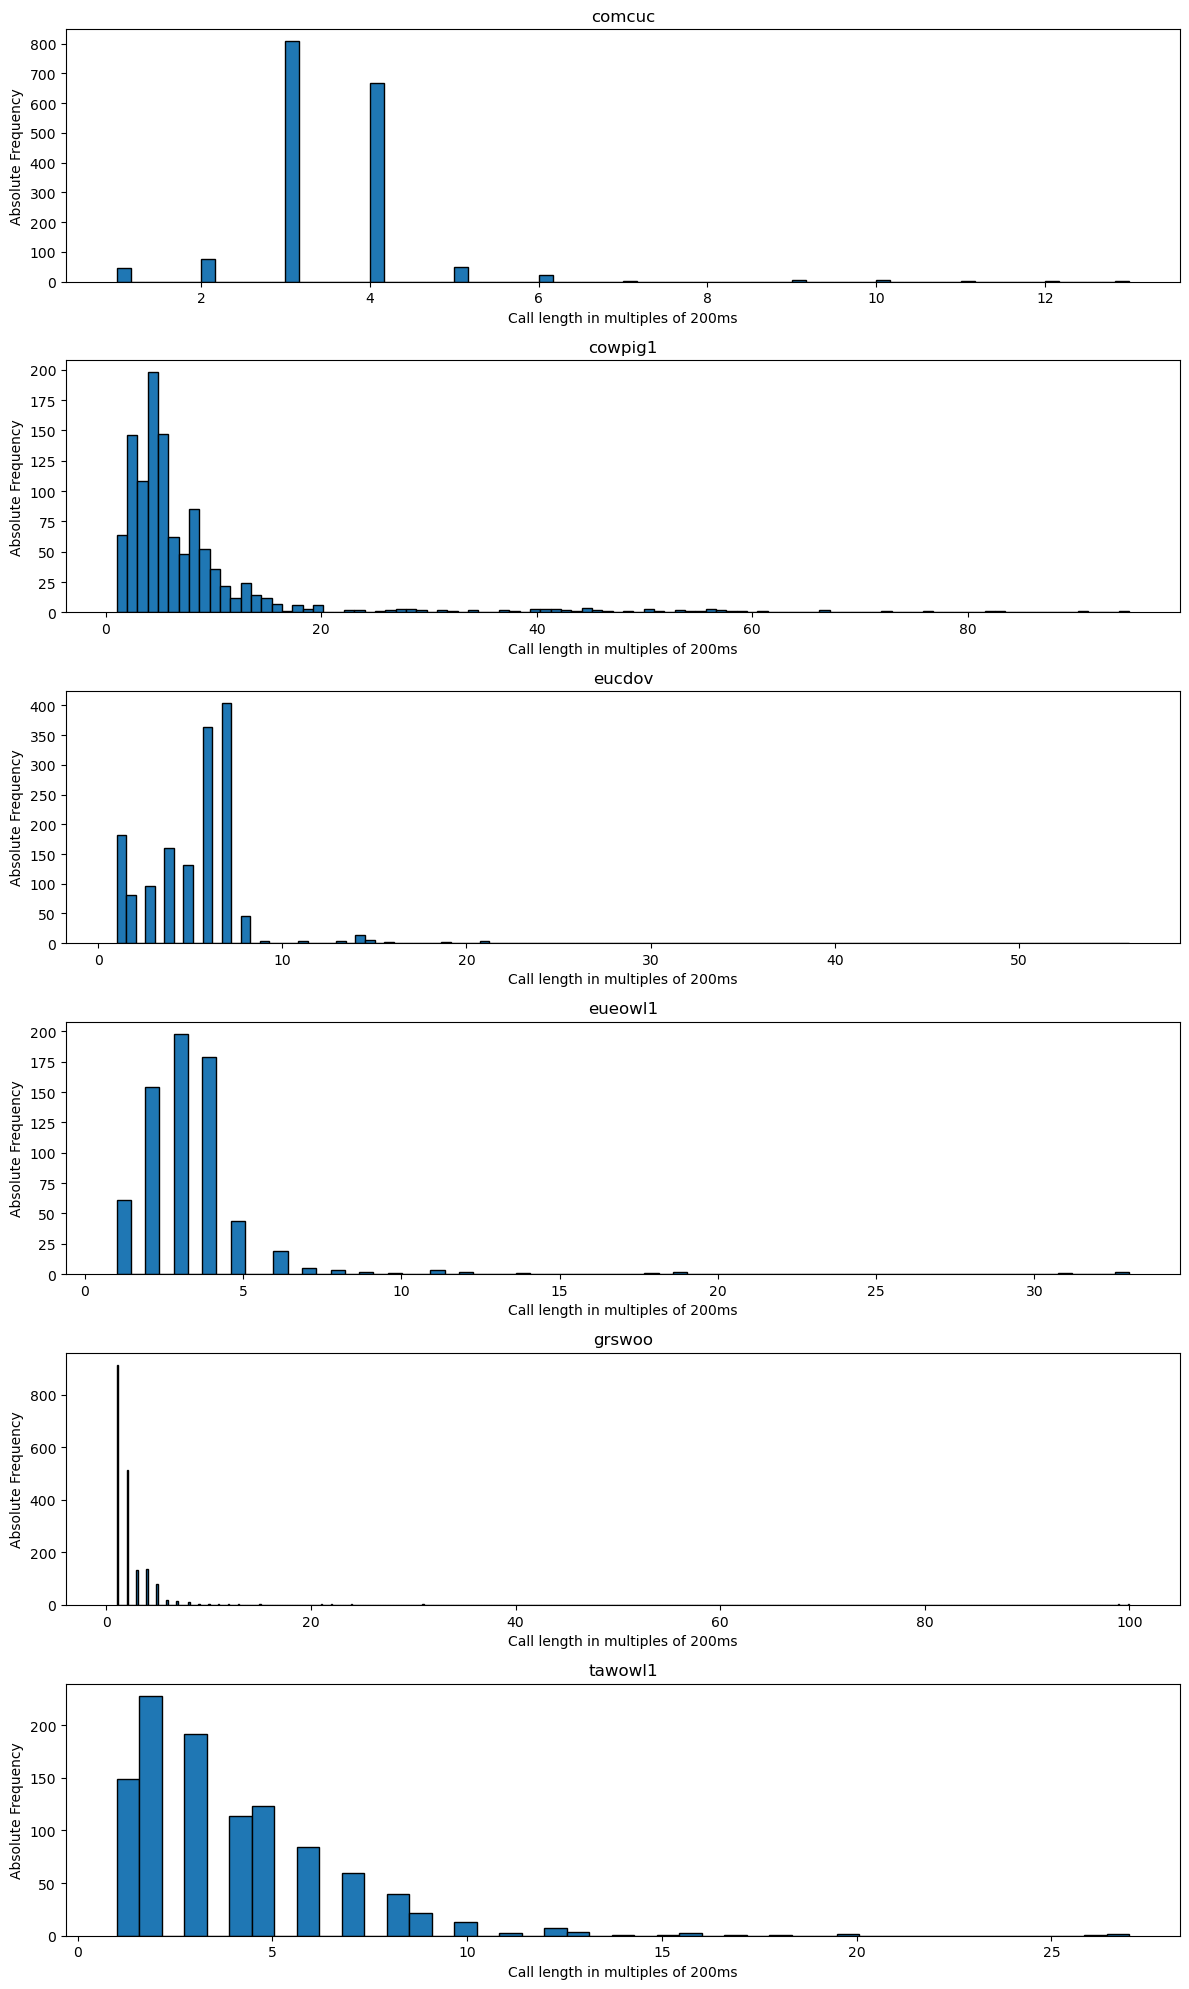

In [70]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 20))

for class_data, label, ax in zip(call_sequences_hist, labels_hist, axes.ravel()):
    ax.hist(class_data, bins='auto', edgecolor='black')
    ax.set_title(label)
    ax.set_xlabel('Call length in multiples of 200ms')
    ax.set_ylabel('Absolute Frequency')

fig.tight_layout()
plt.show()

3. Feature characteristics

How are the features distributed? Are there any pairs or
subsets of features that seem highly correlated or redundant?

In [76]:
#print(featurenames)

In [63]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

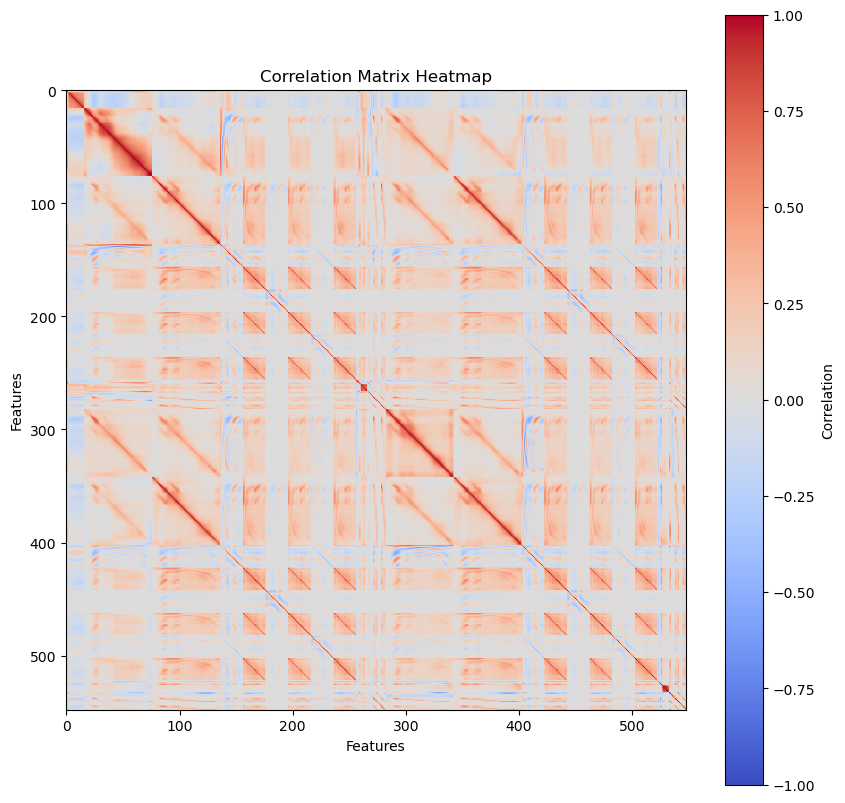

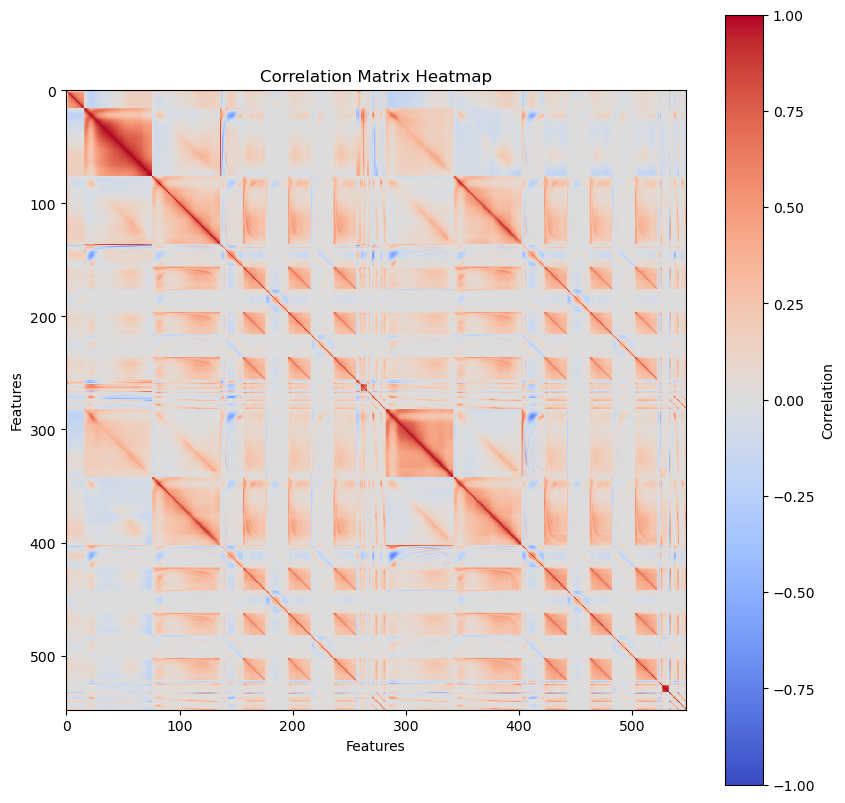

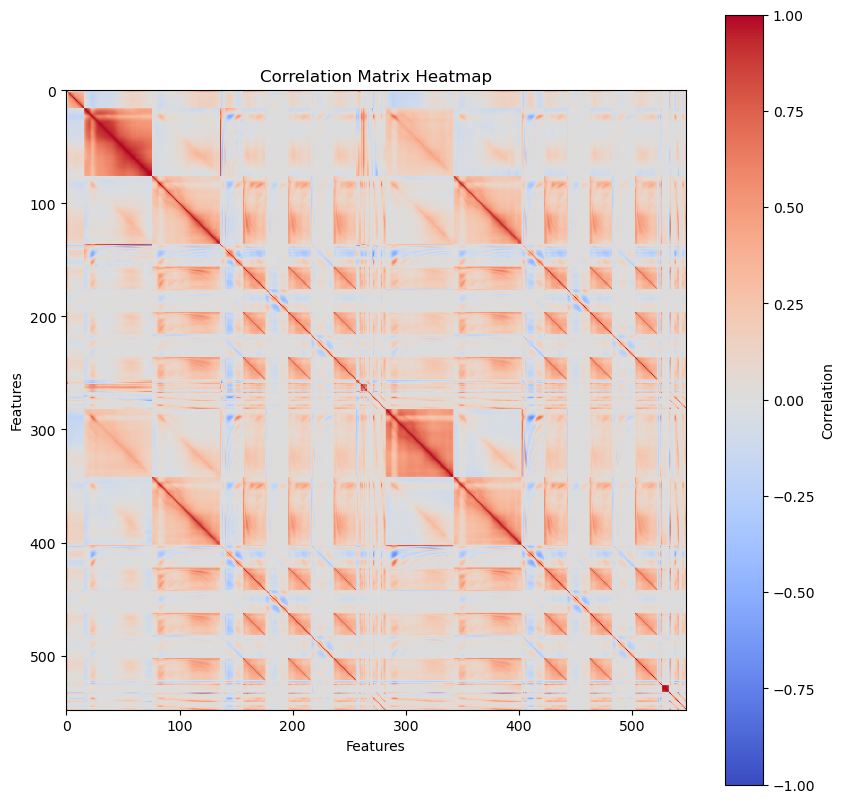

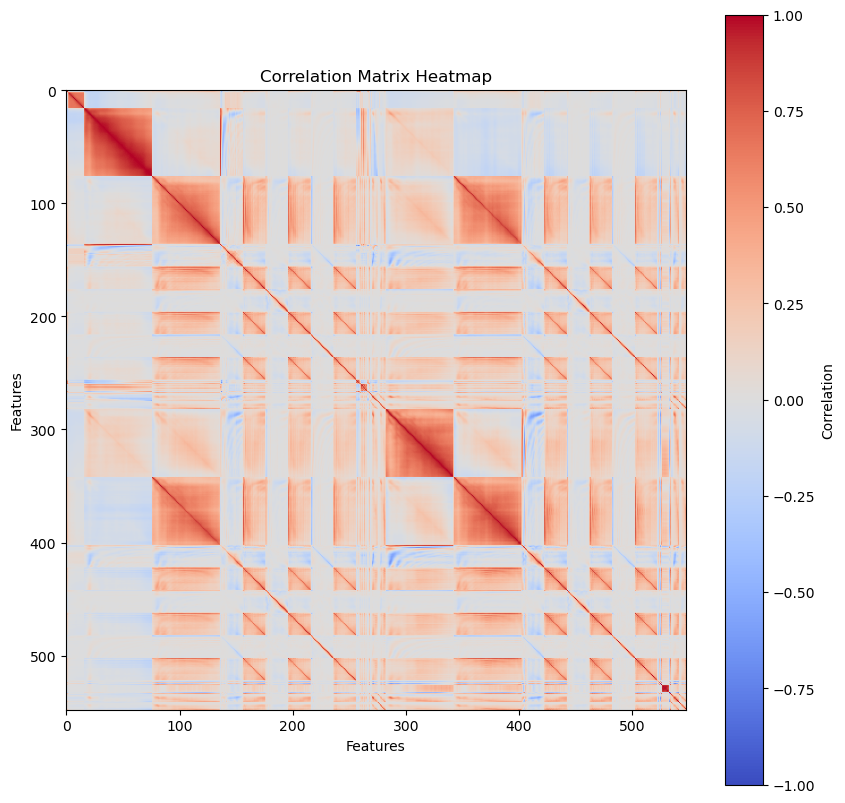

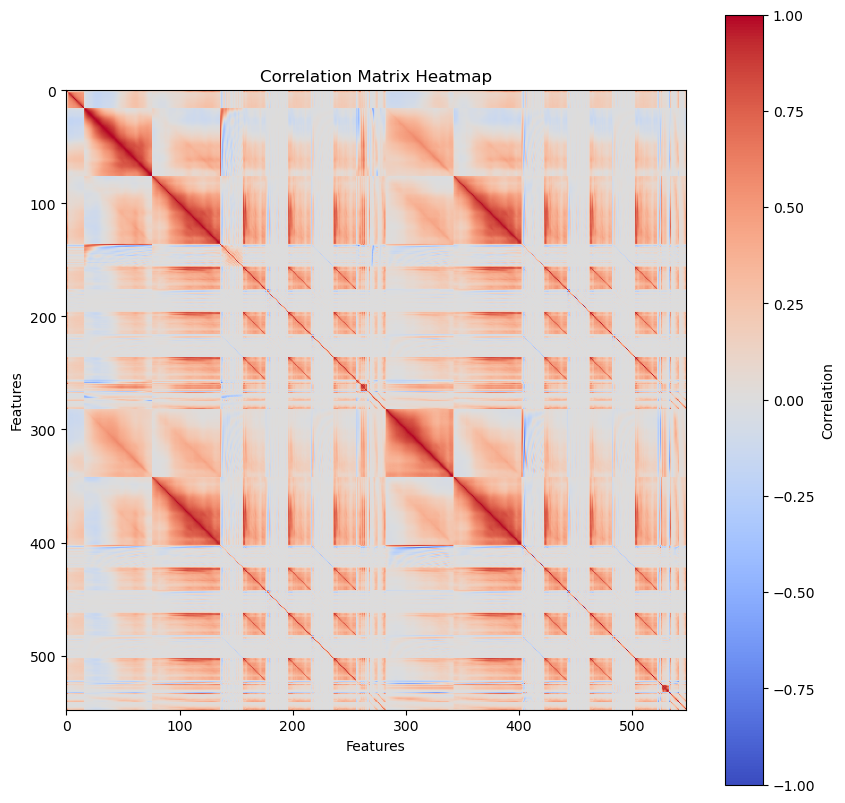

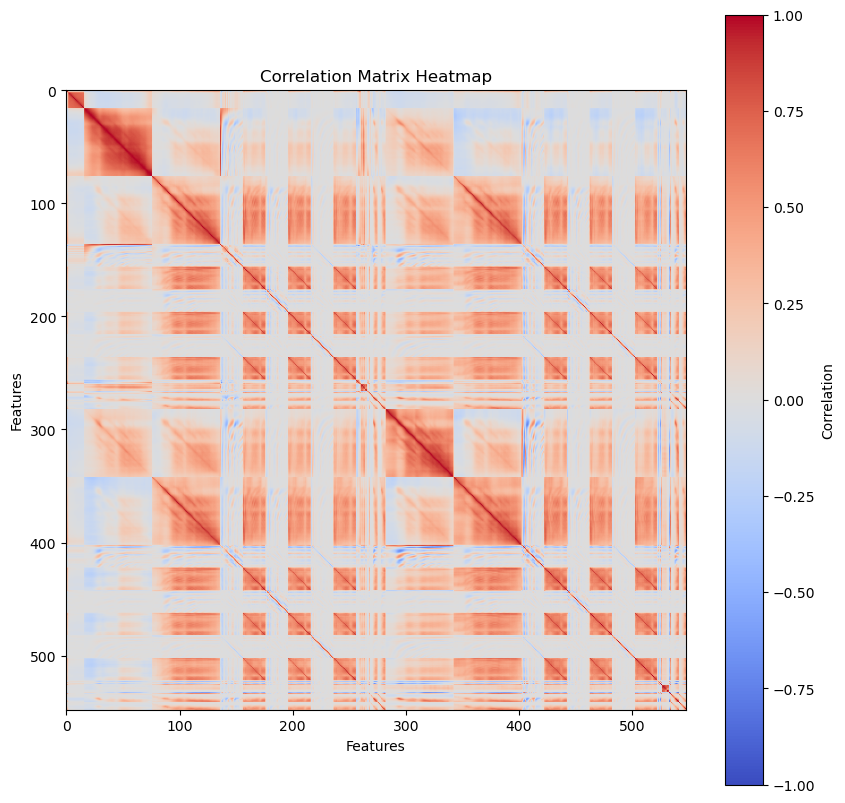

In [73]:
for i in range(features_data.shape[0]):
    class_features = features_data[i].reshape(-1, features_data[i].shape[-1])
    class_features_T = class_features.T
    feature_corr = np.corrcoef(class_features_T)
    plt.figure(figsize=(10,10))
    plt.imshow(feature_corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(label="Correlation")
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.title("Correlation Matrix Heatmap")
    plt.show()
    

4. Feature/Label agreement

Which features seem useful for classification? Which
ones are correlated with the labels?

In [75]:
features_data = np.asarray(features_data)
correlations_classes = []

for i in range(features_data.shape[0]):
    labels_flat = np.asarray([label[0] for labels in labels_data[i] for label in labels])
    labels_flat[labels_flat != 0] = 1
    correlations_class = []
    for j in range(features_data.shape[3]):
        correlations_class.append(np.corrcoef(labels_flat, features_data[i][:, :, j].flatten())[0,1])
    correlations_classes.append(correlations_class)
    
correlations_classes = np.asarray(correlations_classes)

for j in range(len(correlations_classes)):
    print(f'\nMax and min correlations for class {j+1}')
    partitioned_max = np.argpartition(correlations_classes[j], -10)[-10:]
    argmax_indices = partitioned_max[np.argsort(correlations_classes[j][partitioned_max])]

    partitioned_min = np.argpartition(correlations_classes[j], 10)[:10]
    argmin_indices = partitioned_min[np.argsort(correlations_classes[j][partitioned_min])]
    
    print(argmax_indices)
    
    print('\nMax correlations')
    for i in range(len(argmax_indices)):
        print(f'{featurenames[argmax_indices[9-i]]}: \t {correlations_classes[j][argmax_indices[9-i]]}')
    print('\nMin correlations')
    for i in range(len(argmin_indices)):
        print(f'{featurenames[argmin_indices[i]]}: \t {correlations_classes[j][argmin_indices[i]]}')


Max and min correlations for class 1
[544 290  25 292 271 278 350  84 291 537]

Max correlations
cln_contrast_mean_3: 	 0.6925317556411086
cln_melspect_mean_9: 	 0.6688152653571827
raw_melspect_std_8: 	 0.6539925851966794
cln_melspect_std_8: 	 0.6481760752549929
raw_contrast_std_3: 	 0.6389625666737242
raw_contrast_mean_3: 	 0.6361956393552652
cln_melspect_mean_10: 	 0.6300679170590948
raw_melspect_mean_9: 	 0.6258599465179733
cln_melspect_mean_8: 	 0.6182878006430249
cln_contrast_std_3: 	 0.6155290093619371

Min correlations
cln_mfcc_mean_7: 	 -0.442420922858519
raw_mfcc_mean_7: 	 -0.430708253979355
cln_mfcc_mean_6: 	 -0.3961327864557977
cln_centroid_mean: 	 -0.38629241341964815
cln_mfcc_mean_5: 	 -0.34453767698145116
raw_mfcc_mean_8: 	 -0.3442248582309781
cln_mfcc_mean_8: 	 -0.3400234275952344
raw_mfcc_mean_5: 	 -0.3391822010168229
raw_mfcc_mean_6: 	 -0.32276121510221245
cln_flatness_mean: 	 -0.30643523855653165

Max and min correlations for class 2
[290 286  23 289  21 287 537 288 